## Q1. Install and load the latest versions of TensorFlow and Keras. Print  their versions.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
print(f"Version Of Tensorflow is {tf.__version__}")
print(f"Version Of Keras of Tensorflow is {tf.keras.__version__}")

Version Of Tensorflow is 2.12.0
Version Of Keras of Tensorflow is 2.12.0


## Q2. Load the Wine Quality dataset and explore its dimensions.
Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

In [3]:
df=pd.read_csv("/wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [4]:
df.shape

(1599, 12)

## Q3. Check for null values, identify categorical variables, and encode them

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is No Null value in data set

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB



Feature Quality is an Catagorical Feature

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [8]:
df["quality"].unique()

array(['bad', 'good'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoded=encoder.fit_transform(df[["quality"]])

In [10]:
df["quality"]=encoded

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## Q4. Separate the features and target variables from the dataframe.

In [12]:
## Segrating the Dependent and Independent Variables
X=df.drop(labels=["quality"],axis=True)
y=df["quality"]

In [13]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [14]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

## Q5. Perform a train-test split and divide the data into training, validation, and test datasets

In [15]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [16]:
X_train_full.shape

(1119, 11)

In [17]:
y_train_full.shape

(1119,)

In [18]:
X_valid,X_train=X_train_full[:100],X_train_full[100:]
y_valid,y_train=y_train_full[:100],y_train_full[100:]

## Q6. Scale the dataset using an appropriate scaling technique.

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_valid=scaler.transform(X_valid)

## Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.

In [21]:
LAYERS = [tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1",input_dim=11),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(1, activation="softmax", name="outputLayer")]

## Q8. Create a Sequential model in Keras and add the previously designed layers to it.

In [22]:
model_clf=tf.keras.models.Sequential(LAYERS)

In [23]:
model_clf.layers

## Q9. Print the summary of the model architecture.

In [24]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenLayer1 (Dense)        (None, 300)               3600      
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 1)                 101       
                                                                 
Total params: 33,801
Trainable params: 33,801
Non-trainable params: 0
_________________________________________________________________


## Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.

In [30]:
LOSS_FUNCTION = "binary_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

## Q11. Compile the model with the specified loss function, optimizer, and metrics.

In [31]:
model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

## Q12. Fit the model to the training data using appropriate batch size and number of epochs.

In [33]:
# Fit the model to the training data with validation
batch_size = 1
epochs = 10
history=model_clf.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
          validation_data=(X_valid, y_valid))

Epoch 1/10
1019/1019 [==============================] - 2s 2ms/step - loss: 0.5761 - accuracy: 0.5319 - val_loss: 0.6426 - val_accuracy: 0.4600
Epoch 2/10
1019/1019 [==============================] - 2s 2ms/step - loss: 0.5361 - accuracy: 0.5319 - val_loss: 0.5628 - val_accuracy: 0.4600
Epoch 3/10
1019/1019 [==============================] - 2s 2ms/step - loss: 0.5354 - accuracy: 0.5319 - val_loss: 0.5628 - val_accuracy: 0.4600
Epoch 4/10
1019/1019 [==============================] - 2s 2ms/step - loss: 0.5262 - accuracy: 0.5319 - val_loss: 0.5690 - val_accuracy: 0.4600
Epoch 5/10
1019/1019 [==============================] - 5s 4ms/step - loss: 0.5246 - accuracy: 0.5319 - val_loss: 0.5797 - val_accuracy: 0.4600
Epoch 6/10
1019/1019 [==============================] - 2s 2ms/step - loss: 0.5168 - accuracy: 0.5319 - val_loss: 0.5575 - val_accuracy: 0.4600
Epoch 7/10
1019/1019 [==============================] - 2s 2ms/step - loss: 0.5181 - accuracy: 0.5319 - val_loss: 0.5607 - val_accuracy:

## Q13. Obtain the model's parameters (weights and biases).

In [35]:
for layer in model_clf.layers:
    print("Layer name:", layer.name)
    print("Weights shape:", layer.get_weights()[0].shape)
    print("Biases shape:", layer.get_weights()[1].shape)
    print("")

Layer name: hiddenLayer1
Weights shape: (11, 300)
Biases shape: (300,)

Layer name: hiddenLayer2
Weights shape: (300, 100)
Biases shape: (100,)

Layer name: outputLayer
Weights shape: (100, 1)
Biases shape: (1,)



## Q14. Store the model's training history as a Pandas DataFrame.

In [38]:
data=pd.DataFrame(history.history)
data

,loss,accuracy,val_loss,val_accuracy
0,0.576095,0.531894,0.642606,0.46
1,0.536053,0.531894,0.562782,0.46
2,0.535373,0.531894,0.562757,0.46
3,0.526193,0.531894,0.569045,0.46
4,0.524642,0.531894,0.579735,0.46
5,0.516846,0.531894,0.557461,0.46
6,0.518079,0.531894,0.560736,0.46
7,0.513144,0.531894,0.562651,0.46
8,0.511733,0.531894,0.564141,0.46
9,0.512135,0.531894,0.558566,0.46


## Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

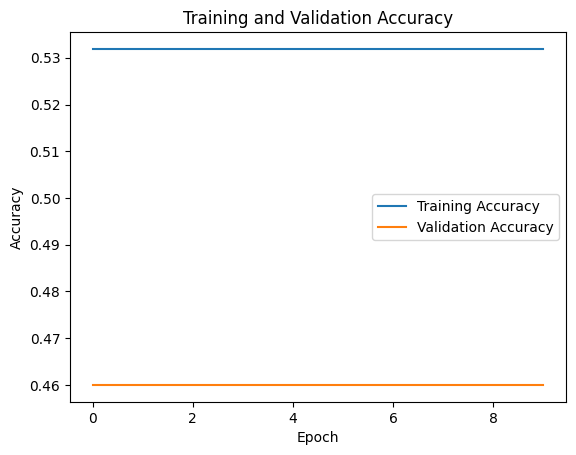

In [39]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

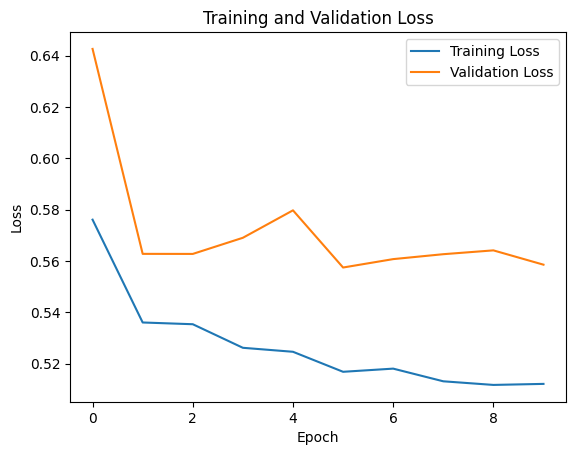

In [40]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

## Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [42]:
# Evaluate the model on the test dataset
loss, accuracy = model_clf.evaluate(X_test, y_test)

# Report the metrics
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

15/15 [==============================] - 0s 3ms/step - loss: 0.5414 - accuracy: 0.5562
Test Loss: 0.5414484739303589
Test Accuracy: 0.5562499761581421
